<a href="https://colab.research.google.com/github/ArianaW37/ds4geo/blob/master/Assignment_3_JanaMolenaar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Living in Innsbruck and in Sydney


In [158]:
# import the needed libraries and datasets.
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

ibk = pd.read_csv('https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Innsbruck_weather_2015-19.csv',
                  sep = ',')
syd = pd.read_csv('https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Sydney_weather_2015-19.csv',
                  sep = ',')
lon = pd.read_csv('https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/London_weather_2015-19.csv',
                  sep = ',')
teh = pd.read_csv('https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Tehran_weather_2015-19.csv',
                 sep = ',')
sin = pd.read_csv('https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Singapore_weather_2015-19.csv',
                  sep = ',')

# Save the original column names as a variable to check units later and change column names to something shorter.
#Set the date column as datetime and index.
ibk_orig = ibk.columns
syd_org = syd.columns


ibk.columns = ['date', 'mean_temp', 'min_temp', 'max_temp', 'mean_press', 'mean_humid', 'mean_wind', 'precip_sum', 'month', 'month-year', 'year']
syd.columns = ['date', 'mean_temp', 'min_temp', 'max_temp', 'mean_press', 'mean_humid', 'mean_wind', 'precip_sum', 'month', 'month-year', 'year']
lon.columns = ['date', 'mean_temp', 'min_temp', 'max_temp', 'mean_press', 'mean_humid', 'mean_wind', 'precip_sum', 'month', 'month-year', 'year']
teh.columns = ['date', 'mean_temp', 'min_temp', 'max_temp', 'mean_press', 'mean_humid', 'mean_wind', 'precip_sum', 'month', 'month-year', 'year']
sin.columns = ['date', 'mean_temp', 'min_temp', 'max_temp', 'mean_press', 'mean_humid', 'mean_wind', 'precip_sum', 'month', 'month-year', 'year']

ibk["date"] = pd.to_datetime(ibk.date)
syd['date'] = pd.to_datetime(syd.date)

ibk.index = ibk['date']
syd.index = syd['date']

# A Heatmap to compare the mean temperature in all Cities


The correlation heatmap below compares the mean temperature in all 5 cities. As expected, the cities on the northern hemisphere correlate well with each other, but show a negative correlation with Sydney, the only city on the southern hemisphere. Singapore is located close to the equator and the mean temperature at this city does not correlate with any of the others.




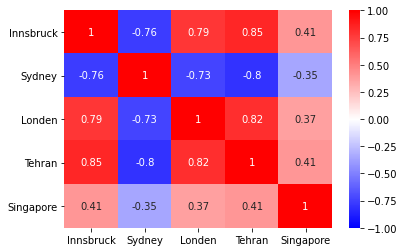

In [159]:
# create a list of all datasets and empty list to store correlation coeffs in.
dfs = [ibk, syd, lon, teh, sin]
corr = []

# Loop to create correlation coeffs. comparing mean_temp of all datasets.
for dat1 in dfs:
   for dat2 in dfs:
     corr.append(np.corrcoef(dat1['mean_temp'].iloc[:1821], 
                             dat2['mean_temp'].iloc[:1821])[0][1])
# Reshape the corr. coeff. list to an array useable in the heatmap plot.
corr_array = np.array(corr)
corr_reshape = corr_array.reshape(5,5)

# Make the heatmap using seaborn!
f = sns.heatmap(corr_reshape, cmap='bwr', annot = True, vmin = -1,
                xticklabels = ['Innsbruck', 'Sydney', 'Londen', 'Tehran', 'Singapore'],
                yticklabels = ['Innsbruck', 'Sydney', 'Londen', 'Tehran', 'Singapore'])

# T-shirt Weather: >15°C.

In [160]:
# Set the conditions of T > 15°C with and without rain for both cities and filter these from the dfs.
syd_norain = syd.loc[(syd['mean_temp'] >= 15) & (syd['precip_sum'] == 0)]
syd_rain = syd.loc[(syd['mean_temp'] >= 15) & (syd['precip_sum'] > 0)]

ibk_norain = ibk.loc[(ibk['mean_temp'] >= 15) & (ibk['precip_sum'] == 0)]
ibk_rain = ibk.loc[(ibk['mean_temp'] >= 15) & (ibk['precip_sum'] > 0)]

#Group the newly created dataframes for month-year and get the mean value and size of each group.
syd_norain_monthly = syd_norain.groupby(syd_norain['month-year'])['mean_temp'].agg([np.mean,np.size])
syd_rain_monthly = syd_rain.groupby(syd_rain['month-year'])['mean_temp'].agg([np.mean,np.size])

ibk_norain_monthly = ibk_norain.groupby([ibk_norain['month-year']])['mean_temp'].agg([np.mean,np.size])
ibk_rain_monthly = ibk_rain.groupby([ibk_rain['month-year']])['mean_temp'].agg([np.mean,np.size])

# Add a column with the city name and if there was rain or no rain to 
#finally concatenate the created tables and use as hue in the barplots.
syd_norain_monthly['city'] = 'Sydney'
syd_norain_monthly['rain'] = 'no'

syd_rain_monthly['city'] ='Sydney'
syd_rain_monthly['rain'] = 'yes'

ibk_norain_monthly['city'] = 'IBK'
ibk_norain_monthly['rain'] = 'no'

ibk_rain_monthly['city'] ='IBK'
ibk_rain_monthly['rain'] = 'yes'

#create lists holding the datasets and then concatenate them.
sydney = [syd_norain_monthly, syd_rain_monthly]
innsbruck = [ibk_norain_monthly, ibk_rain_monthly]

syd_tshirt = pd.concat(sydney)
ibk_tshirt = pd.concat(innsbruck)

tshirt = pd.concat([syd_tshirt, ibk_tshirt])

# Didnt figure out how to make this into a loop.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Apr-2015'),
 Text(0, 0, 'Apr-2016'),
 Text(0, 0, 'Apr-2018'),
 Text(0, 0, 'Apr-2019'),
 Text(0, 0, 'Aug-2015'),
 Text(0, 0, 'Aug-2016'),
 Text(0, 0, 'Aug-2017'),
 Text(0, 0, 'Aug-2018'),
 Text(0, 0, 'Aug-2019'),
 Text(0, 0, 'Jul-2015'),
 Text(0, 0, 'Jul-2016'),
 Text(0, 0, 'Jul-2017'),
 Text(0, 0, 'Jul-2018'),
 Text(0, 0, 'Jul-2019'),
 Text(0, 0, 'Jun-2015'),
 Text(0, 0, 'Jun-2016'),
 Text(0, 0, 'Jun-2017'),
 Text(0, 0, 'Jun-2018'),
 Text(0, 0, 'Jun-2019'),
 Text(0, 0, 'May-2015'),
 Text(0, 0, 'May-2016'),
 Text(0, 0, 'May-2017'),
 Text(0, 0, 'May-2018'),
 Text(0, 0, 'May-2019'),
 Text(0, 0, 'Nov-2016'),
 Text(0, 0, 'Nov-2018'),
 Text(0, 0, 'Oct-2015'),
 Text(0, 0, 'Oct-2016'),
 Text(0, 0, 'Oct-2018'),
 Text(0, 0, 'Oct-2019'),
 Text(0, 0, 'Sep-2015'),
 Text(0, 0, 'Sep-2016'),
 Text(0, 0, 'Sep-2018'),
 Text(0, 0, 'Sep-2019'),
 Text(0, 0, 'Apr-2018')]

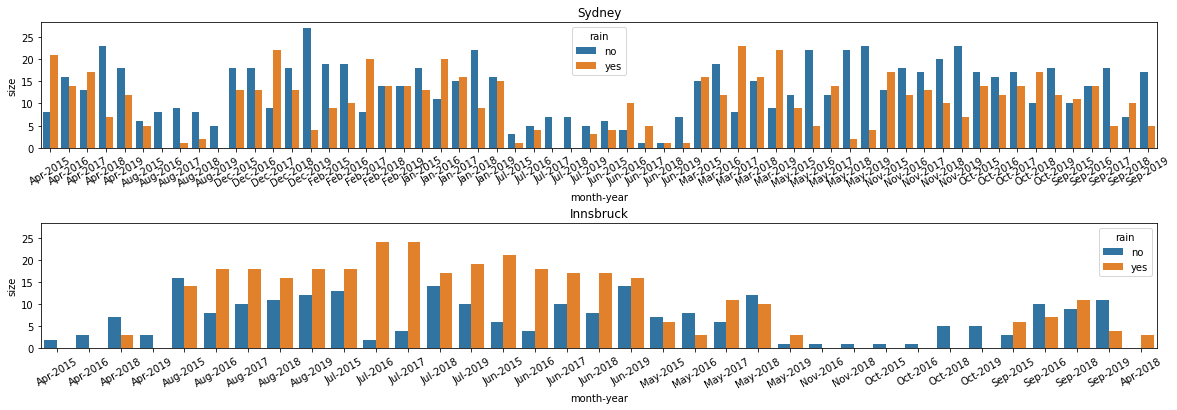

In [161]:
# Create the plot and use hue to display for rain and no rain days. 
#Also, set the #labels.

fig, axes = plt.subplots(2, 1, figsize = (20, 6), sharey = True)
plt.subplots_adjust(hspace = .6)

sns.barplot(syd_tshirt.index,syd_tshirt['size'],
            hue = syd_tshirt['rain'], ax=axes[0])
sns.barplot(ibk_tshirt.index,ibk_tshirt['size'],
            hue = ibk_tshirt['rain'], ax=axes[1])

axes[0].title.set_text('Sydney')
axes[1].title.set_text('Innsbruck')

axes[0].set_xticklabels(syd_tshirt.index, rotation=30)
axes[1].set_xticklabels(ibk_tshirt.index, rotation=30)

# Didnt figure out:
# How to sort the x-axis by year and month and not alphanetically?

In [162]:
# Set dictionaries using the variables determined before to fill in the string later.
sydney_fmt = {'all_syd' : len(syd_norain) + len(syd_rain),
          'syd_rain' : len(syd_rain), 
          'syd_norain': len(syd_norain)}
ibk_fmt = {'all_ibk' : len(ibk_norain) + len(ibk_rain),
          'ibk_rain' : len(ibk_rain), 
          'ibk_norain': len(ibk_norain)}

# Make the string using string formatting
print('Sydney had a total of {all_syd} days above 15°C in the period of 2015 to 2019.'.format(**sydney_fmt) +
      '\n Of these days, {syd_rain} had rain, whereas {syd_norain} didnt have any rain.'.format(**sydney_fmt))
print('Innsbruck had a total of {all_ibk} days above 15°C in the period of 2015 to 2019.'.format(**ibk_fmt) +
      '\n Of these days, {ibk_rain} had rain, whereas {ibk_norain} didnt have any rain.'.format(**ibk_fmt))
print('\n Conclusion: You have more chances to wear a tshirt in Sydney.')

Sydney had a total of 1407 days above 15°C in the period of 2015 to 2019.
 Of these days, 609 had rain, whereas 798 didnt have any rain.
Innsbruck had a total of 580 days above 15°C in the period of 2015 to 2019.
 Of these days, 342 had rain, whereas 238 didnt have any rain.

 Conclusion: You have more chances to wear a tshirt in Sydney.
